In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
'''
   Authors: - SYED ASIF AHMAD QADRI (110065859), FINI IUNI (111065425) and JEAN CARLOS (111065422) 
            NATIONAL TSING HUA UNIVERSITY (NTHU), HSINCHU, TAIWAN 
   In this project we will be recognising Emotion from EEG signals.
   About the data set : The data set is called the SEED data set.
   It contains data of 15 people that underwent trails 15 times each thrice.

           Total data items =  15 (subjects) * 15 (trials each) * 3 (sessions each)
                            = 675 data items

   Our project consists of 4 modules, namely :applying ICA, identifying and removing artifacts, feature extraction, feature reduction (PCA) and 
   classification using different ML and DL algorithms.
   

'''

'\n   Authors: - SYED ASIF AHMAD QADRI (110065859), FINI IUNI (111065425) and JEAN CARLOS (111065422) \n            NATIONAL TSING HUA UNIVERSITY (NTHU), HSINCHU, TAIWAN \n   In this project we will be recognising Emotion from EEG signals.\n   About the data set : The data set is called the SEED-IV data set.\n   It contains data of 15 people that underwent trails 15 times each thrice.\n\n           Total data items =  15 (subjects) * 15 (trials each) * 3 (sessions each)\n                            = 675 data items\n\n   Our project consists of 4 modules, namely :applying ICA, identifying and removing artifacts, feature extraction, feature reduction (PCA) and \n   classification using different ML and DL algorithms.\n   \n\n'

In [7]:
# reading the channel order for dataframe
channel_order = pd.read_excel("Channel Order.xlsx", header=None)
channel_order.head()

,0
0,FP1
1,FPZ
2,FP2
3,AF3
4,AF4


In [10]:
# load your data
df = pd.read_excel('SEED_stimulation.xlsx', usecols=['Label'])

# extract labels
labels = df['Label']

In [11]:
labels.head()

0    1.0
1    2.0
2    0.0
3    2.0
4    0.0
Name: Label, dtype: float64

In [12]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [17]:
files = os.listdir ("E:\Courses\SEM-3\BCI\Final_assign\Code\Combined")
files

['10_20151014.mat',
 '10_20151021.mat',
 '10_20151023.mat',
 '11_20150916.mat',
 '11_20150921.mat',
 '11_20151011.mat',
 '12_20150725.mat',
 '12_20150804.mat',
 '12_20150807.mat',
 '13_20151115.mat',
 '13_20151125.mat',
 '13_20161130.mat',
 '14_20151205.mat',
 '14_20151208.mat',
 '14_20151215.mat',
 '15_20150508.mat',
 '15_20150514.mat',
 '15_20150527.mat',
 '1_20160518.mat',
 '1_20161125.mat',
 '1_20161126.mat',
 '2_20150915.mat',
 '2_20150920.mat',
 '2_20151012.mat',
 '3_20150919.mat',
 '3_20151018.mat',
 '3_20151101.mat',
 '4_20151111.mat',
 '4_20151118.mat',
 '4_20151123.mat',
 '5_20160406.mat',
 '5_20160413.mat',
 '5_20160420.mat',
 '6_20150507.mat',
 '6_20150511.mat',
 '6_20150512.mat',
 '7_20150715.mat',
 '7_20150717.mat',
 '7_20150721.mat',
 '8_20151103.mat',
 '8_20151110.mat',
 '8_20151117.mat',
 '9_20151028.mat',
 '9_20151119.mat',
 '9_20151209.mat']

# wavelet_energy

In [7]:
def calc_wavelet_energy(data_set):
  """
    Input : 1 * N vector
    Output: Float with the wavelet energy of the input vector,
    rounded to 3 decimal places.
  """
  # p_sqr = [i ** 2 for i in data_set]
  wavelet_energy = np.nansum(np.log2(np.square(data_set)))
  return round(wavelet_energy, 3)

# shannon_entropy

In [8]:
 def calc_shannon_entropy(data_set):
        """
            Input : 1 * N vector
            Output: Float with the wavelet entropy of the input vector,
                    rounded to 3 decimal places.
        """
        # probability = [i ** 2 for i in data_set]
        probability = np.square(data_set)
        shannon_entropy = -np.nansum(probability * np.log2(probability))
        return round(shannon_entropy, 3)

In [12]:
def preprocess_inputs(df):
  df = df.copy()
    
  df['label'] = df['label'].replace(label_mapping)
    
  y = df['label'].copy()
  X = df.drop('label', axis=1).copy()
    
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
  return X_train, X_test, y_train, y_test

# Recurrent Neural Network (RNN)

In [23]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 2548, 1)          0         
                                                                 
 gru (GRU)                   (None, 2548, 256)         198912    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense (Dense)               (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50
)


Epoch 1/50


C:\Users\syeda\anaconda3\envs\tensor\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


38/38 [==============================] - 10s 161ms/step - loss: 27.3446 - accuracy: 0.8164 - val_loss: 4.7605 - val_accuracy: 0.9264
Epoch 2/50
38/38 [==============================] - 6s 153ms/step - loss: 11.4045 - accuracy: 0.8759 - val_loss: 34.8146 - val_accuracy: 0.8763
Epoch 3/50
38/38 [==============================] - 6s 153ms/step - loss: 6.8879 - accuracy: 0.9212 - val_loss: 3.7218 - val_accuracy: 0.9231
Epoch 4/50
38/38 [==============================] - 6s 153ms/step - loss: 1.1203 - accuracy: 0.9749 - val_loss: 5.2701 - val_accuracy: 0.9231
Epoch 5/50
38/38 [==============================] - 6s 153ms/step - loss: 0.4443 - accuracy: 0.9866 - val_loss: 1.4105 - val_accuracy: 0.9666
Epoch 6/50
38/38 [==============================] - 6s 154ms/step - loss: 0.2536 - accuracy: 0.9908 - val_loss: 1.7452 - val_accuracy: 0.9565
Epoch 7/50
38/38 [==============================] - 6s 153ms/step - loss: 0.0528 - accuracy: 0.9950 - val_loss: 1.4874 - val_accuracy: 0.9398
Epoch 8/50
38

In [25]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 97.500%


20/20 [==============================] - 2s 69ms/step


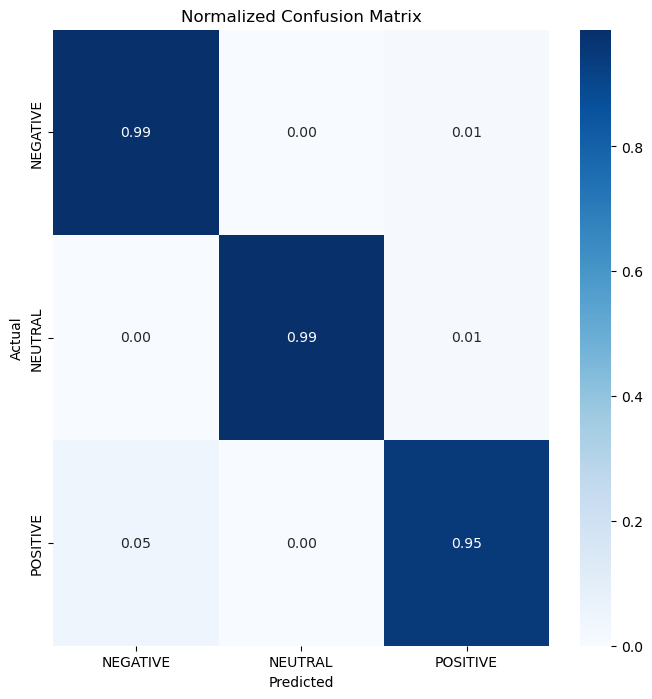

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.95      0.99      0.97       201
     NEUTRAL       1.00      0.99      0.99       231
    POSITIVE       0.97      0.95      0.96       208

    accuracy                           0.97       640
   macro avg       0.97      0.97      0.97       640
weighted avg       0.98      0.97      0.98       640



In [26]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm / cm.sum(axis=1, keepdims=True)  # Normalize the confusion matrix

clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)


# "Convolutional Recurrent Neural Network" (CRNN) or "CNN-GRU Model".

In [27]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
expand_dims = tf.expand_dims(inputs, axis=2)

conv1 = tf.keras.layers.Conv1D(64, 3, activation='relu')(expand_dims)
maxpool1 = tf.keras.layers.MaxPooling1D(3)(conv1)

conv2 = tf.keras.layers.Conv1D(128, 3, activation='relu')(maxpool1)
maxpool2 = tf.keras.layers.MaxPooling1D(3)(conv2)

gru = tf.keras.layers.GRU(256)(maxpool2)

outputs = tf.keras.layers.Dense(3, activation='softmax')(gru)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50
)


Epoch 1/50


C:\Users\syeda\anaconda3\envs\tensor\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


38/38 [==============================] - 4s 34ms/step - loss: 0.3692 - accuracy: 0.8567 - val_loss: 0.2622 - val_accuracy: 0.8997
Epoch 2/50
38/38 [==============================] - 1s 26ms/step - loss: 0.2467 - accuracy: 0.8994 - val_loss: 0.2710 - val_accuracy: 0.8662
Epoch 3/50
38/38 [==============================] - 1s 26ms/step - loss: 0.2294 - accuracy: 0.9011 - val_loss: 0.2284 - val_accuracy: 0.9197
Epoch 4/50
38/38 [==============================] - 1s 26ms/step - loss: 0.2123 - accuracy: 0.9254 - val_loss: 0.2068 - val_accuracy: 0.9197
Epoch 5/50
38/38 [==============================] - 1s 26ms/step - loss: 0.2013 - accuracy: 0.9304 - val_loss: 0.1981 - val_accuracy: 0.9231
Epoch 6/50
38/38 [==============================] - 1s 25ms/step - loss: 0.1874 - accuracy: 0.9329 - val_loss: 0.2254 - val_accuracy: 0.9197
Epoch 7/50
38/38 [==============================] - 1s 25ms/step - loss: 0.1930 - accuracy: 0.9279 - val_loss: 0.1986 - val_accuracy: 0.9231
Epoch 8/50
38/38 [======

In [28]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 93.750%


20/20 [==============================] - 1s 18ms/step


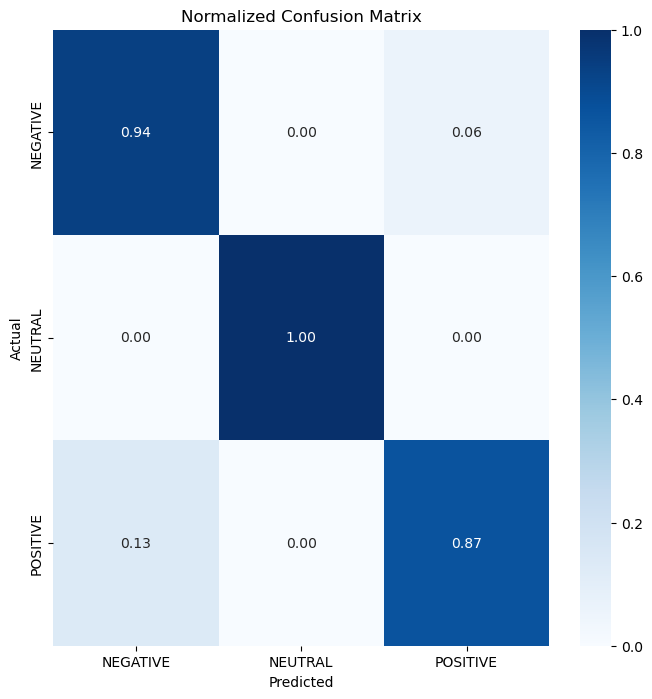

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.87      0.94      0.90       201
     NEUTRAL       1.00      1.00      1.00       231
    POSITIVE       0.94      0.87      0.90       208

    accuracy                           0.94       640
   macro avg       0.94      0.94      0.93       640
weighted avg       0.94      0.94      0.94       640



In [29]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm / cm.sum(axis=1, keepdims=True)  # Normalize the confusion matrix

clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)


# "Two-Layer Bidirectional LSTM Model" 

In [16]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
expand_dims = tf.expand_dims(inputs, axis=2)

bilstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True))(expand_dims)
bilstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))(bilstm)

outputs = tf.keras.layers.Dense(3, activation='softmax')(bilstm)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50
)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 2548, 1)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 2548, 512)        528384    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              656384    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 1,185,539
Trainable params: 1,185,539
Non-train

C:\Users\syeda\anaconda3\envs\tensor\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


38/38 [==============================] - 30s 684ms/step - loss: 0.3344 - accuracy: 0.8617 - val_loss: 0.2876 - val_accuracy: 0.8930
Epoch 2/50
38/38 [==============================] - 25s 662ms/step - loss: 0.1849 - accuracy: 0.9304 - val_loss: 0.2577 - val_accuracy: 0.8896
Epoch 3/50
38/38 [==============================] - 25s 657ms/step - loss: 0.1752 - accuracy: 0.9262 - val_loss: 0.2788 - val_accuracy: 0.9030
Epoch 4/50
38/38 [==============================] - 25s 648ms/step - loss: 0.1646 - accuracy: 0.9346 - val_loss: 0.2154 - val_accuracy: 0.9130
Epoch 5/50
38/38 [==============================] - 24s 641ms/step - loss: 0.1472 - accuracy: 0.9380 - val_loss: 0.2332 - val_accuracy: 0.8796
Epoch 6/50
38/38 [==============================] - 24s 640ms/step - loss: 0.1441 - accuracy: 0.9430 - val_loss: 0.2533 - val_accuracy: 0.9130
Epoch 7/50
38/38 [==============================] - 24s 637ms/step - loss: 0.1247 - accuracy: 0.9514 - val_loss: 0.1898 - val_accuracy: 0.9298
Epoch 8/50

In [17]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 98.125%


20/20 [==============================] - 6s 257ms/step


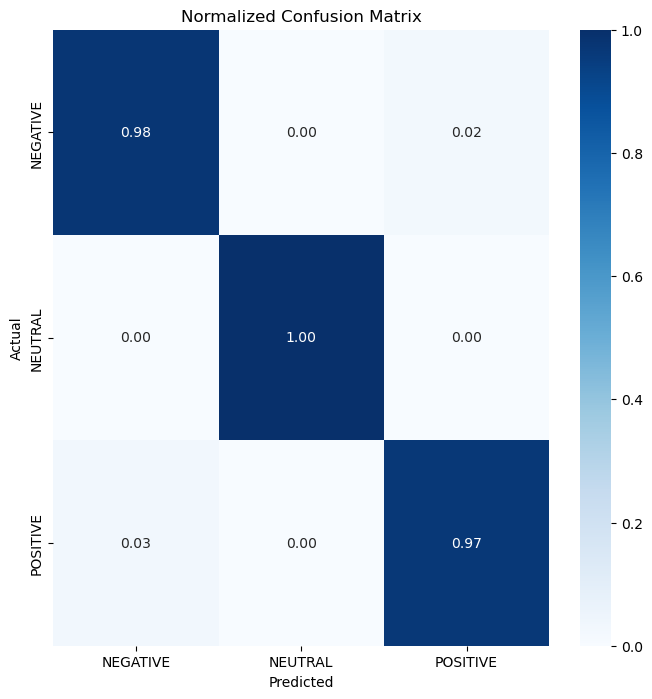

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.97      0.98      0.97       201
     NEUTRAL       1.00      1.00      1.00       231
    POSITIVE       0.98      0.97      0.97       208

    accuracy                           0.98       640
   macro avg       0.98      0.98      0.98       640
weighted avg       0.98      0.98      0.98       640



In [18]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm / cm.sum(axis=1, keepdims=True)  # Normalize the confusion matrix

clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

# "CNN-BiLSTM Model" >>> "2-Layer CNN and 2-Layer BiLSTM Model"

In [19]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
expand_dims = tf.expand_dims(inputs, axis=2)

conv1 = tf.keras.layers.Conv1D(64, 3, activation='relu')(expand_dims)
maxpool1 = tf.keras.layers.MaxPooling1D(3)(conv1)

conv2 = tf.keras.layers.Conv1D(128, 3, activation='relu')(maxpool1)
maxpool2 = tf.keras.layers.MaxPooling1D(3)(conv2)

bilstm1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True))(maxpool2)
bilstm2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))(bilstm1)

dense = tf.keras.layers.Dense(64, activation='relu')(bilstm2)
outputs = tf.keras.layers.Dense(3, activation='softmax')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50
)


Epoch 1/50


C:\Users\syeda\anaconda3\envs\tensor\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


38/38 [==============================] - 8s 109ms/step - loss: 0.3546 - accuracy: 0.8709 - val_loss: 0.3165 - val_accuracy: 0.8595
Epoch 2/50
38/38 [==============================] - 3s 88ms/step - loss: 0.2408 - accuracy: 0.9153 - val_loss: 0.2591 - val_accuracy: 0.8930
Epoch 3/50
38/38 [==============================] - 3s 84ms/step - loss: 0.2297 - accuracy: 0.9195 - val_loss: 0.2591 - val_accuracy: 0.9030
Epoch 4/50
38/38 [==============================] - 3s 84ms/step - loss: 0.2024 - accuracy: 0.9254 - val_loss: 0.2433 - val_accuracy: 0.9064
Epoch 5/50
38/38 [==============================] - 3s 85ms/step - loss: 0.1854 - accuracy: 0.9363 - val_loss: 0.2572 - val_accuracy: 0.8997
Epoch 6/50
38/38 [==============================] - 3s 85ms/step - loss: 0.1718 - accuracy: 0.9388 - val_loss: 0.2244 - val_accuracy: 0.9264
Epoch 7/50
38/38 [==============================] - 3s 85ms/step - loss: 0.1692 - accuracy: 0.9355 - val_loss: 0.2329 - val_accuracy: 0.9030
Epoch 8/50
38/38 [=====

In [20]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 92.656%


20/20 [==============================] - 1s 34ms/step


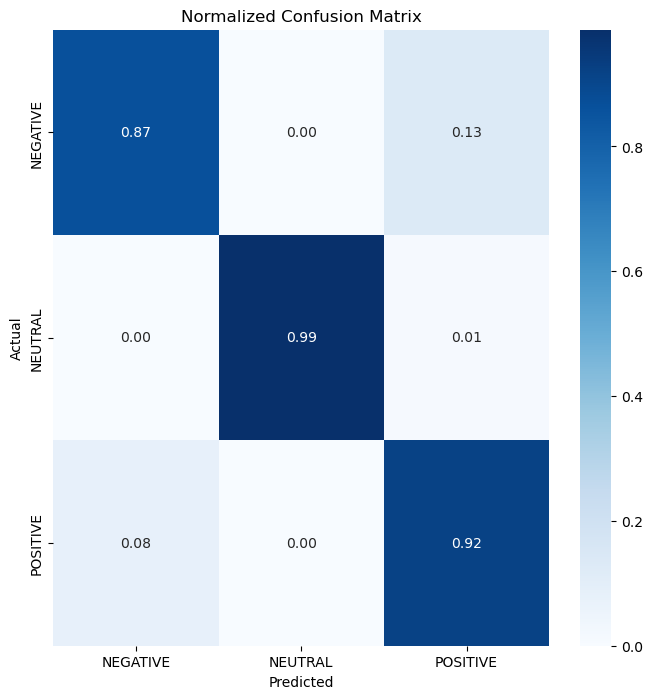

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.91      0.87      0.89       201
     NEUTRAL       1.00      0.99      0.99       231
    POSITIVE       0.86      0.92      0.89       208

    accuracy                           0.93       640
   macro avg       0.93      0.92      0.92       640
weighted avg       0.93      0.93      0.93       640



In [21]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm / cm.sum(axis=1, keepdims=True)  # Normalize the confusion matrix

clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)